# 📊 PHÂN TÍCH ĐẶC TRƯNG VÀ ĐÁNH GIÁ KHẢ NĂNG PHÂN LOẠI

---

## 🔹 TH1: 1 đặc trưng (Chiều dài đài hoa - *Sepal Length*)

- Khi chỉ xét **1 đặc trưng duy nhất**, ta chỉ có thể phân biệt rõ ràng **Setosa** với các loài khác.  
- Tuy nhiên, **Versicolor** và **Virginica** bị chồng lấn → không phân biệt được.  

👉 **Kết luận:** 1 đặc trưng chỉ đủ tách **2 loài (Setosa và phần nào Versicolor)**, không đủ cho cả 3 loài.  

📌 **Cell 1:** trực quan hoá bằng scatter (1D → hiển thị dưới dạng điểm theo trục ngang).  

---

## 🔹 TH2: 2 đặc trưng (Chiều dài + Chiều rộng đài hoa - *Sepal Length, Sepal Width*)

- Khi xét **2 đặc trưng**, không gian biểu diễn chuyển sang **2D (mặt phẳng)**.  
- Ta phân biệt được **Setosa** rất rõ, và phần nào tách được **Versicolor**.  
- Tuy nhiên, **Versicolor** và **Virginica** vẫn có sự chồng lấn mạnh.  

👉 **Kết luận:** 2 đặc trưng **cải thiện phân biệt**, nhưng vẫn chưa đủ để tách cả 3 loài.  

📌 **Cell 2:** biểu diễn bằng scatter plot 2D.  

---

## 🔹 TH3: 3 đặc trưng (Chiều dài + Chiều rộng đài hoa + Chiều dài cánh hoa - *Sepal Length, Sepal Width, Petal Length*)

- Khi thêm đặc trưng thứ 3, ta biểu diễn dữ liệu trong **không gian 3D**.  
- Nhìn trực quan hơn: **Setosa** tách biệt hoàn toàn.  
- Tuy nhiên, **Versicolor** và **Virginica** vẫn còn bị chồng lấn → chưa tách dứt khoát.  

👉 **Kết luận:** 3 đặc trưng vẫn **chưa đủ** để phân biệt rõ ràng cả 3 loài.  

📌 **Cell 3:** biểu diễn bằng scatter plot 3D.  

---

## 🔹 TH4: 4 đặc trưng (Chiều dài + Chiều rộng đài hoa + Chiều dài + Chiều rộng cánh hoa)

- Ở đây ta có **không gian 4 chiều (4D)**.  
- Con người **không thể trực quan hoá trực tiếp 4D**, nhưng có thể:  
  - Dùng **giảm chiều (PCA, LDA, t-SNE, UMAP)** để chiếu dữ liệu về 2D hoặc 3D.  
  - Hoặc áp dụng **mô hình học máy** để phân loại tự động.  

👉 **Kết luận:** Với 4 đặc trưng, bộ dữ liệu **Iris** có thể phân biệt được hoàn toàn 3 loài hoa, nhưng **cần công cụ toán học/máy học** thay vì trực quan hoá.  


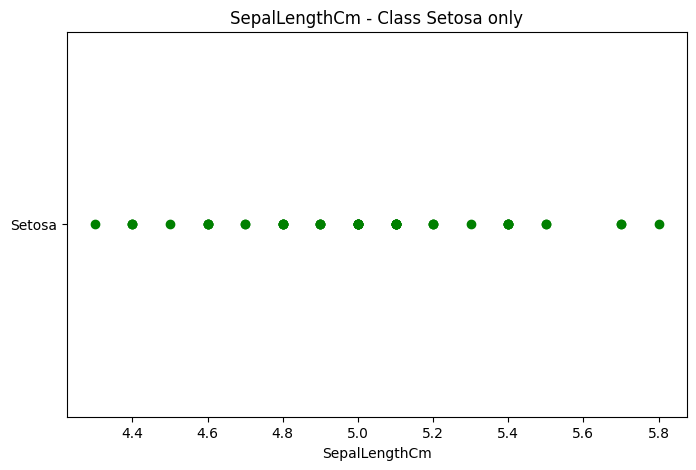

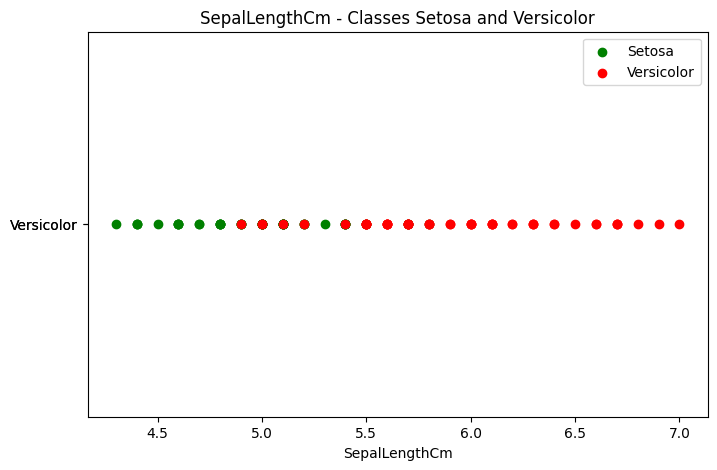

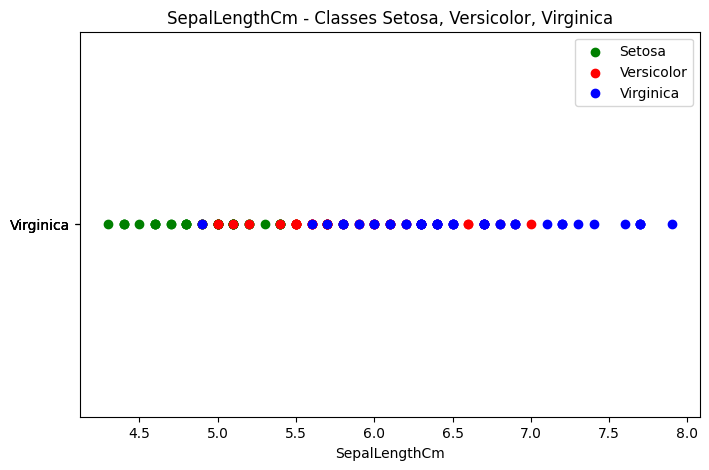

In [17]:
import matplotlib.pyplot as plt   # Thư viện để vẽ biểu đồ
import pandas as pd               # Thư viện để xử lý dữ liệu dạng bảng (CSV, Excel...)

# Đọc dữ liệu từ file CSV
iris = pd.read_csv('Iris.csv')    # Tải dữ liệu Iris từ file (bạn thay đường dẫn cho đúng)

feature = 'SepalLengthCm'         # Chọn đặc trưng muốn phân tích (SepalLengthCm)

# =======================
# 1. Vẽ cho class Setosa
# =======================
fig, ax = plt.subplots(figsize=(8,5))   # Tạo figure và axes để vẽ, kích thước 8x5 inch
ax.scatter(                             # Vẽ scatter plot
    iris.loc[iris['Species'] == 'Iris-setosa', feature],  # Giá trị trục X = SepalLengthCm của Setosa
    [1] * sum(iris['Species'] == 'Iris-setosa'),          # Giá trị trục Y = 1 (tất cả điểm nằm ngang ở y=1)
    color='green', label='Setosa'                         # Màu xanh lá, nhãn là Setosa
)
ax.set_title(f'{feature} - Class Setosa only')  # Đặt tiêu đề biểu đồ
ax.set_xlabel(feature)                          # Đặt nhãn trục X
ax.set_yticks([1])                              # Gắn tick (vạch) cho trục Y tại vị trí 1
ax.set_yticklabels(['Setosa'])                  # Gắn nhãn "Setosa" tại vị trí Y=1
plt.show()                                      # Hiển thị biểu đồ

# ====================================
# 2. Vẽ cho Setosa + Versicolor
# ====================================
fig, ax = plt.subplots(figsize=(8,5))   # Tạo figure mới
ax.scatter(
    iris.loc[iris['Species'] == 'Iris-setosa', feature],  # X = SepalLengthCm của Setosa
    [1] * sum(iris['Species'] == 'Iris-setosa'),          # Y = 1 cho Setosa
    color='green', label='Setosa'
)
ax.scatter(
    iris.loc[iris['Species'] == 'Iris-versicolor', feature], # X = SepalLengthCm của Versicolor
    [1] * sum(iris['Species'] == 'Iris-versicolor'),         # ⚠️ Bạn đang để Y=1 → chồng lên Setosa
    color='red', label='Versicolor'
)
ax.set_title(f'{feature} - Classes Setosa and Versicolor')   # Đặt tiêu đề
ax.set_xlabel(feature)                                       # Nhãn trục X
ax.set_yticks([1, 1])                                        # ⚠️ Đang để cả hai cùng y=1 (không tách hàng)
ax.set_yticklabels(['Setosa', 'Versicolor'])                 # Gắn nhãn
plt.legend()                                                 # Hiển thị chú thích màu
plt.show()

# ====================================
# 3. Vẽ cho cả 3 class
# ====================================
fig, ax = plt.subplots(figsize=(8,5))   # Figure mới
ax.scatter(
    iris.loc[iris['Species'] == 'Iris-setosa', feature],  # X = SepalLengthCm của Setosa
    [1] * sum(iris['Species'] == 'Iris-setosa'),          # Y = 1
    color='green', label='Setosa'
)
ax.scatter(
    iris.loc[iris['Species'] == 'Iris-versicolor', feature], # X = SepalLengthCm của Versicolor
    [1] * sum(iris['Species'] == 'Iris-versicolor'),         # ⚠️ Y = 1 (đang trùng với Setosa)
    color='red', label='Versicolor'
)
ax.scatter(
    iris.loc[iris['Species'] == 'Iris-virginica', feature],  # X = SepalLengthCm của Virginica
    [1] * sum(iris['Species'] == 'Iris-virginica'),          # ⚠️ Y = 1 (trùng hết)
    color='blue', label='Virginica'
)
ax.set_title(f'{feature} - Classes Setosa, Versicolor, Virginica')  # Tiêu đề
ax.set_xlabel(feature)                                              # Nhãn trục X
ax.set_yticks([1, 1, 1])                                            # ⚠️ Tất cả cùng 1 hàng
ax.set_yticklabels(['Setosa', 'Versicolor', 'Virginica'])           # Nhãn trục Y
plt.legend()                                                        # Hiển thị chú thích
plt.show()


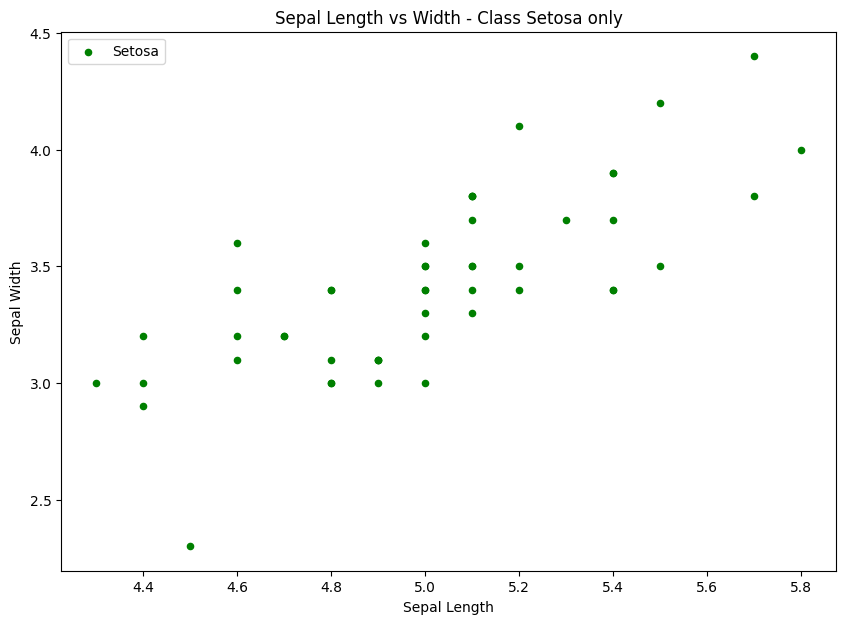

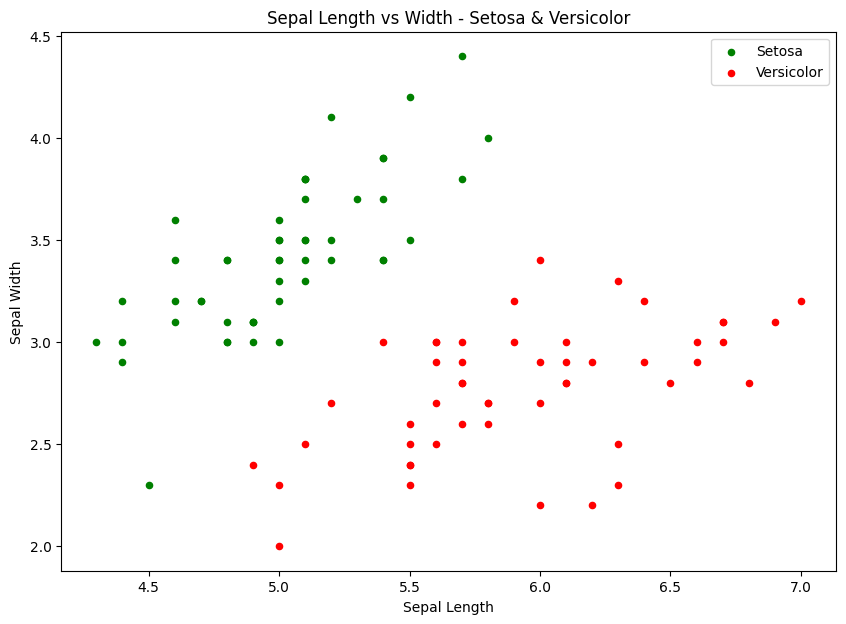

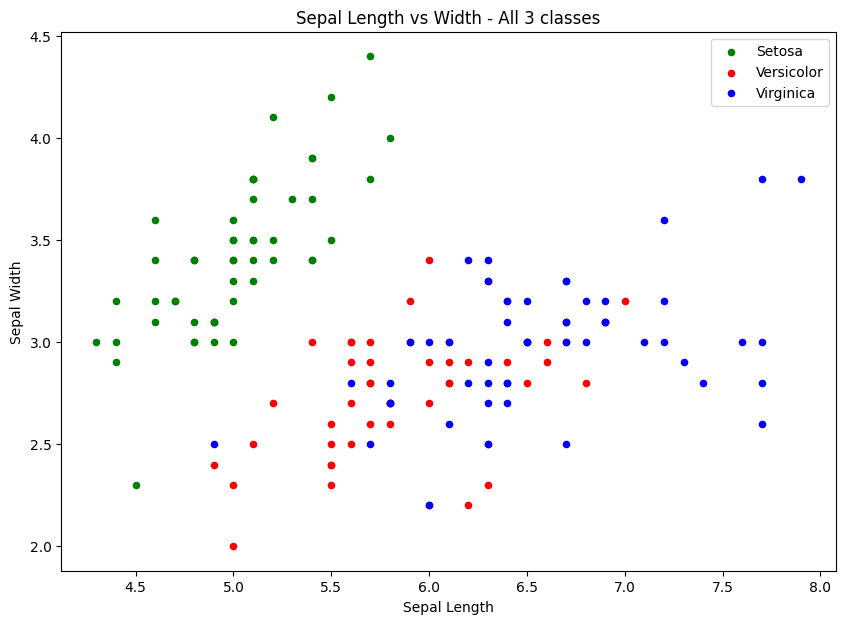

In [23]:
import matplotlib.pyplot as plt      # import matplotlib để vẽ biểu đồ
import pandas as pd                  # import pandas để xử lý dữ liệu dạng bảng

# Đọc dữ liệu từ file CSV vào DataFrame
iris = pd.read_csv("Iris.csv")       # đọc file 'Iris.csv' vào biến iris

# =========================
# Trường hợp 1: chỉ 1 class
# =========================
fig, ax = plt.subplots(figsize=(10,7))          # tạo figure và axes kích thước 10x7 inch
iris[iris.Species == 'Iris-setosa'].plot(       # lọc dữ liệu theo loài 'Setosa' và vẽ scatter
    kind='scatter',                             # chọn kiểu biểu đồ scatter
    x='SepalLengthCm', y='SepalWidthCm',        # trục X: SepalLengthCm, trục Y: SepalWidthCm
    color='green', label='Setosa', ax=ax        # màu xanh, label hiển thị là 'Setosa', vẽ trên trục ax
)
ax.set_xlabel('Sepal Length')                   # đặt nhãn cho trục X
ax.set_ylabel('Sepal Width')                    # đặt nhãn cho trục Y
ax.set_title('Sepal Length vs Width - Class Setosa only')  # tiêu đề cho biểu đồ
plt.show()                                      # hiển thị biểu đồ

# =========================
# Trường hợp 2: 2 class
# =========================
fig, ax = plt.subplots(figsize=(10,7))          # tạo figure và axes mới
iris[iris.Species == 'Iris-setosa'].plot(       # vẽ scatter cho class Setosa
    kind='scatter',
    x='SepalLengthCm', y='SepalWidthCm',
    color='green', label='Setosa', ax=ax
)
iris[iris.Species == 'Iris-versicolor'].plot(   # vẽ scatter cho class Versicolor
    kind='scatter',
    x='SepalLengthCm', y='SepalWidthCm',
    color='red', label='Versicolor', ax=ax      # màu đỏ, label 'Versicolor'
)
ax.set_xlabel('Sepal Length')                   # nhãn trục X
ax.set_ylabel('Sepal Width')                    # nhãn trục Y
ax.set_title('Sepal Length vs Width - Setosa & Versicolor')  # tiêu đề cho biểu đồ
plt.show()                                      # hiển thị biểu đồ

# =========================
# Trường hợp 3: 3 class
# =========================
fig, ax = plt.subplots(figsize=(10,7))          # tạo figure và axes mới
iris[iris.Species == 'Iris-setosa'].plot(       # vẽ scatter cho Setosa
    kind='scatter',
    x='SepalLengthCm', y='SepalWidthCm',
    color='green', label='Setosa', ax=ax
)
iris[iris.Species == 'Iris-versicolor'].plot(   # vẽ scatter cho Versicolor
    kind='scatter',
    x='SepalLengthCm', y='SepalWidthCm',
    color='red', label='Versicolor', ax=ax
)
iris[iris.Species == 'Iris-virginica'].plot(    # vẽ scatter cho Virginica
    kind='scatter',
    x='SepalLengthCm', y='SepalWidthCm',
    color='blue', label='Virginica', ax=ax      # màu xanh dương, label 'Virginica'
)
ax.set_xlabel('Sepal Length')                   # nhãn trục X
ax.set_ylabel('Sepal Width')                    # nhãn trục Y
ax.set_title('Sepal Length vs Width - All 3 classes')  # tiêu đề cho biểu đồ
plt.show()                                      # hiển thị biểu đồ


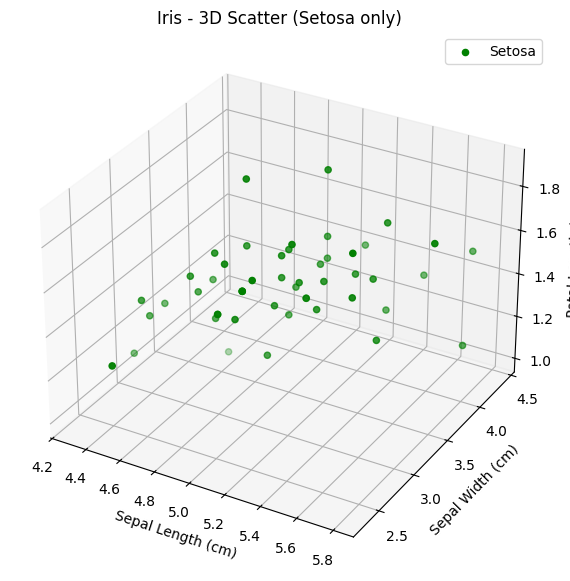

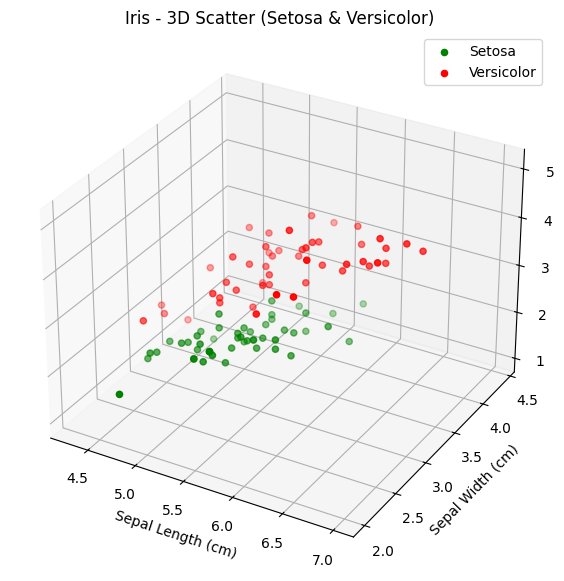

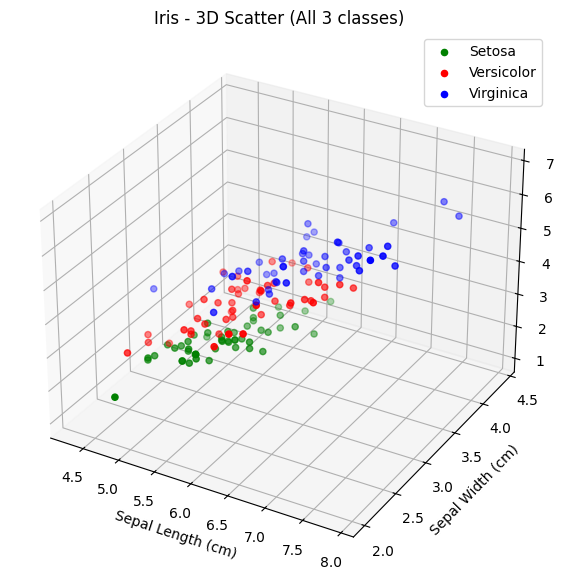

In [22]:
import matplotlib.pyplot as plt                   # thư viện vẽ biểu đồ
from mpl_toolkits.mplot3d import Axes3D           # để dùng biểu đồ 3D
import pandas as pd                               # để xử lý dữ liệu bảng

iris = pd.read_csv("Iris.csv")                    # đọc dữ liệu từ file Iris.csv

# =========================
# Trường hợp 1: chỉ 1 class
# =========================
fig = plt.figure(figsize=(10, 7))                 # tạo figure với kích thước 10x7 inch
ax = fig.add_subplot(111, projection='3d')        # thêm subplot với projection 3D

ax.scatter(                                       
    iris[iris.Species == 'Iris-setosa']['SepalLengthCm'],   # trục X = Sepal Length
    iris[iris.Species == 'Iris-setosa']['SepalWidthCm'],    # trục Y = Sepal Width
    iris[iris.Species == 'Iris-setosa']['PetalLengthCm'],   # trục Z = Petal Length
    color='green', label='Setosa'                 # màu xanh + nhãn Setosa
)

ax.set_xlabel('Sepal Length (cm)')                # nhãn trục X
ax.set_ylabel('Sepal Width (cm)')                 # nhãn trục Y
ax.set_zlabel('Petal Length (cm)')                # nhãn trục Z
ax.set_title('Iris - 3D Scatter (Setosa only)')   # tiêu đề biểu đồ

ax.legend()                                       # hiển thị chú thích
plt.show()                                        # vẽ ra màn hình


# =========================
# Trường hợp 2: 2 class
# =========================
fig = plt.figure(figsize=(10, 7))                 # tạo figure mới
ax = fig.add_subplot(111, projection='3d')        # tạo trục 3D mới

# Class Setosa
ax.scatter(
    iris[iris.Species == 'Iris-setosa']['SepalLengthCm'],   # X = Sepal Length
    iris[iris.Species == 'Iris-setosa']['SepalWidthCm'],    # Y = Sepal Width
    iris[iris.Species == 'Iris-setosa']['PetalLengthCm'],   # Z = Petal Length
    color='green', label='Setosa'                 # xanh lá + nhãn Setosa
)

# Class Versicolor
ax.scatter(
    iris[iris.Species == 'Iris-versicolor']['SepalLengthCm'],   # X = Sepal Length
    iris[iris.Species == 'Iris-versicolor']['SepalWidthCm'],    # Y = Sepal Width
    iris[iris.Species == 'Iris-versicolor']['PetalLengthCm'],   # Z = Petal Length
    color='red', label='Versicolor'              # đỏ + nhãn Versicolor
)

ax.set_xlabel('Sepal Length (cm)')                # nhãn trục X
ax.set_ylabel('Sepal Width (cm)')                 # nhãn trục Y
ax.set_zlabel('Petal Length (cm)')                # nhãn trục Z
ax.set_title('Iris - 3D Scatter (Setosa & Versicolor)')  # tiêu đề biểu đồ

ax.legend()                                       # hiển thị chú thích
plt.show()                                        # vẽ biểu đồ


# =========================
# Trường hợp 3: 3 class
# =========================
fig = plt.figure(figsize=(10, 7))                 # tạo figure mới
ax = fig.add_subplot(111, projection='3d')        # tạo trục 3D mới

# Class Setosa
ax.scatter(
    iris[iris.Species == 'Iris-setosa']['SepalLengthCm'],   # X = Sepal Length
    iris[iris.Species == 'Iris-setosa']['SepalWidthCm'],    # Y = Sepal Width
    iris[iris.Species == 'Iris-setosa']['PetalLengthCm'],   # Z = Petal Length
    color='green', label='Setosa'                 # xanh lá + nhãn Setosa
)

# Class Versicolor
ax.scatter(
    iris[iris.Species == 'Iris-versicolor']['SepalLengthCm'],   # X = Sepal Length
    iris[iris.Species == 'Iris-versicolor']['SepalWidthCm'],    # Y = Sepal Width
    iris[iris.Species == 'Iris-versicolor']['PetalLengthCm'],   # Z = Petal Length
    color='red', label='Versicolor'              # đỏ + nhãn Versicolor
)

# Class Virginica
ax.scatter(
    iris[iris.Species == 'Iris-virginica']['SepalLengthCm'],    # X = Sepal Length
    iris[iris.Species == 'Iris-virginica']['SepalWidthCm'],     # Y = Sepal Width
    iris[iris.Species == 'Iris-virginica']['PetalLengthCm'],    # Z = Petal Length
    color='blue', label='Virginica'             # xanh dương + nhãn Virginica
)

ax.set_xlabel('Sepal Length (cm)')                # nhãn trục X
ax.set_ylabel('Sepal Width (cm)')                 # nhãn trục Y
ax.set_zlabel('Petal Length (cm)')                # nhãn trục Z
ax.set_title('Iris - 3D Scatter (All 3 classes)') # tiêu đề biểu đồ

ax.legend()                                       # hiển thị chú thích
plt.show()                                        # vẽ biểu đồ
